In [1]:
import numpy as np
import nmresearch as nmr
from nmresearch import fermion as f
import matplotlib.pyplot as plt
from nmresearch.fermion import Math as fm

from timeit import default_timer as timer

In [27]:
n=50

xx = nmr.Operator.flipflop(n,periodic=False)
Z = nmr.Operator.global_Z(n)
H= xx

In [31]:
time_evo = f.Unitary(H,.005,4.01)

start=timer()
tpc = np.array([time_evo.local_zz(n//2, r) for r in range(n)])
end=timer()
print(end-start)

0.6253034999826923


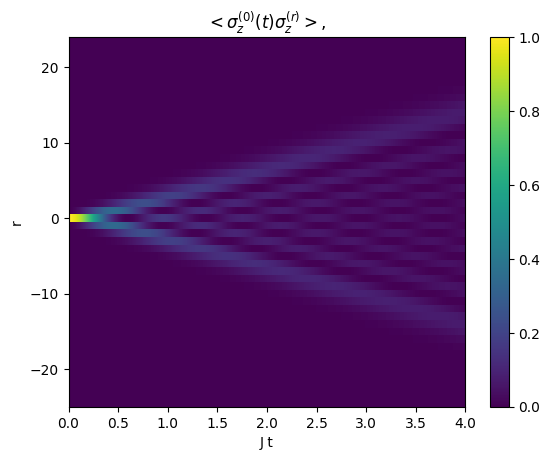

In [32]:
fig, ax = plt.subplots()

c = ax.pcolormesh(time_evo.t, list(range(-25,25,1)), tpc)
ax.set_title(r'$<\sigma_z^{(0)}(t) \sigma_z^{(r)}>$, ')
# set the limits of the plot to the limits of the data
ax.axis([0,4, -25, 24])
ax.set_ylabel('r')
ax.set_xlabel('J t')
fig.colorbar(c, ax=ax)
plt.savefig("dq_tpc_h0.png",format='png',dpi=900,bbox_inches='tight')
plt.show()

63.788140399963595


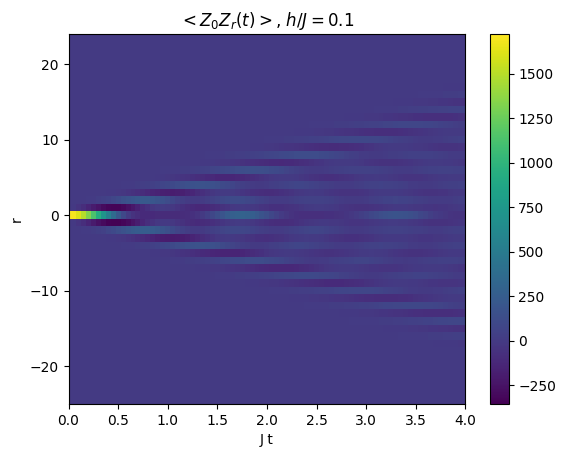

In [16]:
start = timer()

trials = 1000
zz_tpc_avg = np.zeros((n,len(time_evo.t)))
for _ in range(trials):
    disorder = [np.random.normal(0,.1) for _ in range(n)]
    rZ = f.Operator.disorder_Z(n, disorder)

    H=rZ+dq

    time_evo = f.Unitary(H,.05,4.05)
    
    zz_tpc_avg = zz_tpc_avg + np.array([time_evo.local_zz(n//2, r) for r in range(n)])
    
end = timer()
print(end-start)

fig, ax = plt.subplots()

c = ax.pcolormesh(time_evo.t, list(range(-25,25,1)), zz_tpc_avg)
ax.set_title(r'$<Z_0 Z_r(t)>$, $h/J=0.1$')
# set the limits of the plot to the limits of the data
ax.axis([0,4, -25, 24])
ax.set_ylabel('r')
ax.set_xlabel('J t')
fig.colorbar(c, ax=ax)

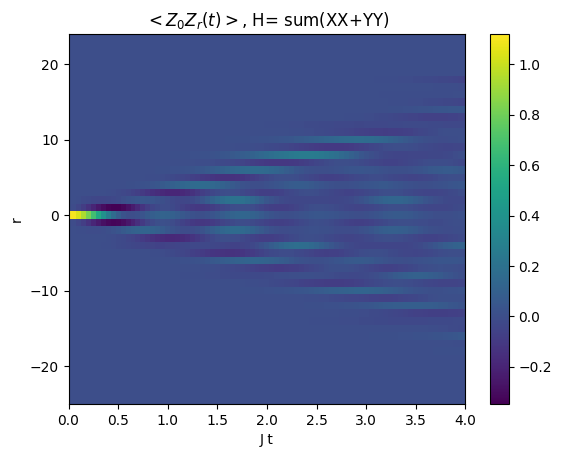

In [22]:
disorder = [np.random.normal(0,.1) for _ in range(n)]
rZ = f.Operator.disorder_Z(n, disorder)

H=rZ+dq

time_evo = f.Unitary(H,.05,4.05)


fig, ax = plt.subplots()

c = ax.pcolormesh(time_evo.t, list(range(-25,25,1)), np.array([time_evo.local_zz(n//2, r) for r in range(n)]))
ax.set_title(r'$<Z_0 Z_r(t)>$, H= sum(XX+YY)')
# set the limits of the plot to the limits of the data
ax.axis([0,4, -25, 24])
ax.set_ylabel('r')
ax.set_xlabel('J t')
fig.colorbar(c, ax=ax)
plt.show()

In [23]:
test = np.array([time_evo.local_zz(n//2, r) for r in range(n)])

In [24]:
test[25]

array([ 1.11991507e+00,  1.09886745e+00,  1.03753348e+00,  9.41142804e-01,
        8.17778890e-01,  6.77510634e-01,  5.31327081e-01,  3.90002258e-01,
        2.63023454e-01,  1.57705828e-01,  7.85905015e-02,  2.71859241e-02,
        2.06828835e-03, -6.88053114e-04,  1.31810085e-02,  3.69835622e-02,
        6.39739280e-02,  8.81876381e-02,  1.05108125e-01,  1.12090943e-01,
        1.08506784e-01,  9.56035432e-02,  7.61248435e-02,  5.37529126e-02,
        3.24635377e-02,  1.58878587e-02,  6.76949642e-03,  6.58739965e-03,
        1.53878342e-02,  3.18372469e-02,  5.34759416e-02,  7.71250583e-02,
        9.93799328e-02,  1.17113913e-01,  1.27918968e-01,  1.30422119e-01,
        1.24437599e-01,  1.10940360e-01,  9.18731832e-02,  6.98233047e-02,
        4.76218918e-02,  2.79285315e-02,  1.28622792e-02,  3.73118324e-03,
        8.95337949e-04,  3.77721425e-03,  1.10105670e-02,  2.06990037e-02,
        3.07402177e-02,  3.91639855e-02,  4.44322006e-02,  4.56571299e-02,
        4.27082634e-02,  

In [26]:
rZ

-0.09963225343130949*a0c0 + -0.14432661845123926*a1c1 + 0.0008762037394778093*a2c2 + -0.0123451386512112*a3c3 + 0.09855804781032489*a4c4 + -0.14493593405003885*a5c5 + 0.03175674102759862*a6c6 + 0.07537787133413162*a7c7 + 0.022976330124186414*a8c8 + 0.12814327585471535*a9c9 + 0.10842269909157831*a10c10 + -0.1945376649515737*a11c11 + -0.05519300369778945*a12c12 + 0.01750513129278727*a13c13 + 0.08065822113609664*a14c14 + 0.05468772938260376*a15c15 + -0.010058182231380254*a16c16 + -0.12088766563345073*a17c17 + 0.13113053535900307*a18c18 + 0.014480406289625656*a19c19 + -0.06963398521221728*a20c20 + -0.14983860459628096*a21c21 + 0.0043837639670228894*a22c22 + -0.06336052199759722*a23c23 + 0.19661868775138336*a24c24 + 0.04892361192376874*a25c25 + -0.09483583410680602*a26c26 + -0.10488317698628158*a27c27 + -0.07260648260823764*a28c28 + 0.01562838166715405*a29c29 + 0.01694986202416444*a30c30 + 0.046050181770832796*a31c31 + 0.03419167486936545*a32c32 + 0.16320853984601377*a33c33 + -0.05941176256